In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
for dirname, _, filenames in os.walk('./images/images/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./images/images/abomasnow.png
./images/images/abra.png
./images/images/absol.png
./images/images/accelgor.png
./images/images/aegislash-blade.png
./images/images/aerodactyl.png
./images/images/aggron.png
./images/images/aipom.png
./images/images/alakazam.png
./images/images/alomomola.png
./images/images/altaria.png
./images/images/amaura.png
./images/images/ambipom.png
./images/images/amoonguss.png
./images/images/ampharos.png
./images/images/anorith.png
./images/images/araquanid.jpg
./images/images/arbok.png
./images/images/arcanine.png
./images/images/arceus.png
./images/images/archen.png
./images/images/archeops.png
./images/images/ariados.png
./images/images/armaldo.png
./images/images/aromatisse.png
./images/images/aron.png
./images/images/articuno.png
./images/images/audino.png
./images/images/aurorus.png
./images/images/avalugg.png
./images/images/axew.png
./images/images/azelf.png
./images/images/azumarill.png
./images/images/azurill.png
./images/images/bagon.png
./images/image

In [2]:
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')

        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))

        # Convert the image color space
        img = img.convert('RGB')

        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [5]:
features = []
img_paths = []

# Iterate through images (Change the path based on your image location)
for dirname, _, filenames in os.walk('./images/images/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        img_path = os.path.join(dirname, filename)
        
        img_paths.append(img_path)

        # FeatureExtractor 클래스의 인스턴스 생성
        fe = FeatureExtractor()

        # 이미지 파일을 열고 FeatureExtractor의 extract 메서드 호출
        # Extract Features
        img_feature = fe.extract(img=Image.open(img_path))
        features.append(img_feature)

        # Extract Features
        # Save the Numpy array (.npy) on designated path
        feature_path = "./images/npy/" + (filename) + ".npy"
        np.save(feature_path, img_feature)
        

./images/images/abomasnow.png
1/1 [==============================] - 0s 151ms/step
./images/images/abra.png
1/1 [==============================] - 0s 159ms/step
./images/images/absol.png
1/1 [==============================] - 0s 160ms/step
./images/images/accelgor.png
1/1 [==============================] - 0s 157ms/step
./images/images/aegislash-blade.png
1/1 [==============================] - 0s 155ms/step
./images/images/aerodactyl.png
1/1 [==============================] - 0s 158ms/step
./images/images/aggron.png
1/1 [==============================] - 0s 154ms/step
./images/images/aipom.png
1/1 [==============================] - 0s 158ms/step
./images/images/alakazam.png
1/1 [==============================] - 0s 146ms/step
./images/images/alomomola.png
1/1 [==============================] - 0s 149ms/step
./images/images/altaria.png
1/1 [==============================] - 0s 155ms/step
./images/images/amaura.png
1/1 [==============================] - 0s 147ms/step
./images/images/ambi

1/1 [==============================] - 0s 101ms/step


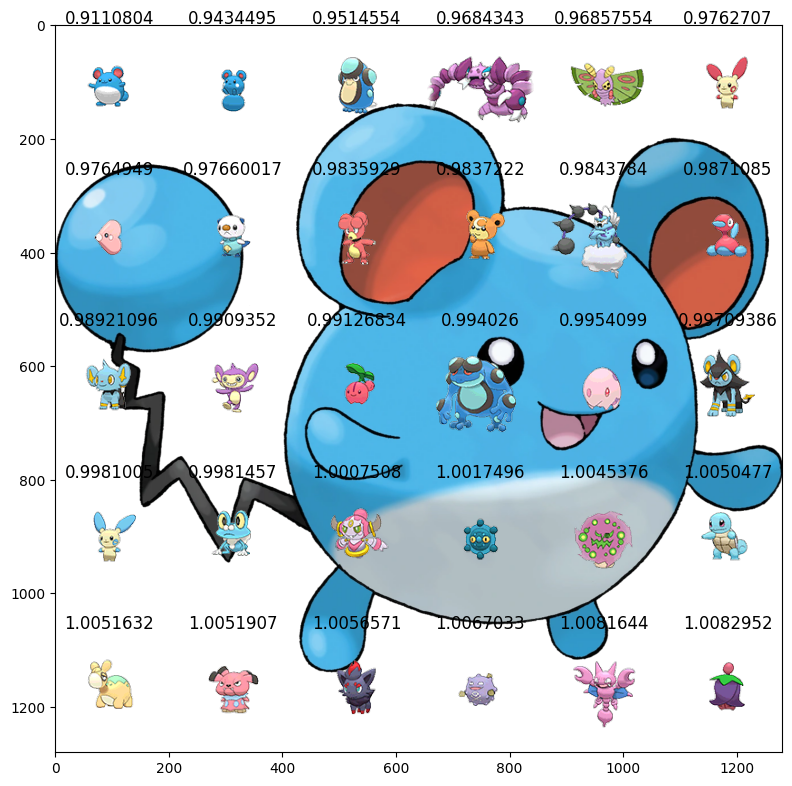

In [10]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("./test_pokemon1.jpg")
query = fe.extract(img)
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result

axes=[]
fig=plt.figure(figsize=(8,8))
plt.imshow(img)

for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()

plt.show()